In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.figure_factory as ff
from scipy import stats

init_notebook_mode(connected=True)

In [40]:
Degree_df = pd.read_csv("d:/UCSD_ECE143/project/degrees-that-pay-back.csv")
College_df = pd.read_csv("d:/UCSD_ECE143/project/salaries-by-college.csv")

#State_df = pd.read_csv("d:/UCSD_ECE143/project/salaries-by-state.csv")

In [3]:
def string_dollar_to_integer(data, column):
    '''
    change string dollar to integer dollar
    example : $75,000.00 to 75000
    data: pandas.core.frame.DataFrame
    column: valid column name in data
    '''
    assert isinstance(column, str)
    assert data.columns.contains(column)
    data[column] = data[column].apply(lambda x: int(x.replace(",","").strip('$').split('.')[0]) if isinstance(x, str) else x)

In [42]:
for df in [Degree_df, College_df]:
    string_dollar_to_integer(df, 'Starting Median Salary')
    string_dollar_to_integer(df, 'Mid-Career Median Salary')
    string_dollar_to_integer(df, 'Mid-Career 10th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 25th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 75th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 90th Percentile Salary')


In [43]:
def visulize_region_difference(College_df, stage_str):
    '''
    College_df : pandas.core.frame.DataFrame
    stage_str: str
    plot state vs salaries
    '''
    State_group = College_df.groupby(['State'])
    state = State_group[stage_str].mean().index
    value = State_group[stage_str].mean().values
    
    data = dict(type = 'choropleth',
               locations = state,
               locationmode = 'USA-states',
               colorscale = 'Portland',#['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            #'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            #'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis'],
               text = state,
               marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
               z = value,
               colorbar = {'title': stage_str})

    layout = dict(title = 'Region wise divide to show '+ stage_str,
             geo=dict(scope = 'usa')) 

    choromap2 = go.Figure(data = [data],layout=layout)
    iplot(choromap2)

In [44]:
visulize_region_difference(College_df, 'Starting Median Salary')

In [45]:
visulize_region_difference(State_df, 'Mid-Career Median Salary')

In [46]:
import scipy
from scipy.optimize import curve_fit

In [83]:
def visulize_schooltype_difference(College_df, stage_str):
    '''
    College_df : pandas.core.frame.DataFrame
    stage_str: str
    plot state vs school type
    '''
    sns.set(style="ticks")
    Public_df = College_df[College_df['School Type']=='Public']
    Private_df = College_df[College_df['School Type']=='Private']

    sns.set(style="darkgrid")
    # Set up the figure
    f, ax = plt.subplots()
    #ax.set_aspect("equal")

    # 
    ax = sns.distplot(Public_df[stage_str].values, bins=15, kde=False, fit=stats.gamma, label='Public');
    ax = sns.distplot(Private_df[stage_str].values, bins=15, kde=False, fit=stats.gamma, label='Private');

    plt.legend()
    #ax = sns.jointplot(Public_df["Starting Median Salary"].values, Public_df["Mid-Career Median Salary"].values, color="#4CB391", ax=ax)
    #ax = sns.jointplot(Private_df["Starting Median Salary"].values, Private_df["Mid-Career Median Salary"].values, ax=ax)

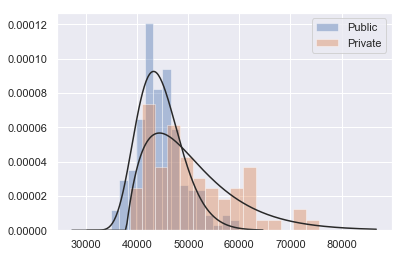

In [84]:
visulize_schooltype_difference(College_df, "Starting Median Salary")

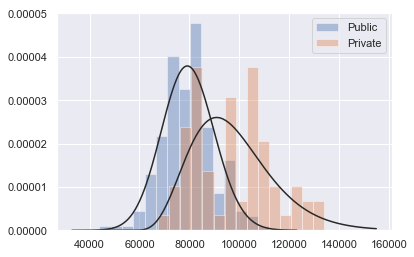

In [85]:
visulize_schooltype_difference(College_df, "Mid-Career Median Salary")